<a href="https://colab.research.google.com/github/Rajdip-projects/OIBSIP/blob/main/Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Rajdip-projects/OIBSIP.git

Cloning into 'OIBSIP'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 0), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 5.33 KiB | 5.33 MiB/s, done.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/content/OIBSIP/Datasets/car data.csv")
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [11]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Display the first few rows of the cleaned data
print(data.head())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0             False              True                    False   
1              True             False                    False   
2             False              True                    False   
3             False              True                    False   
4              True             False                    False   

   T

In [12]:
# Define the feature set and target variable
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Display the feature set and target variable
print(X.head())
print(y.head())


   Year  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014           5.59       27000      0             False              True   
1  2013           9.54       43000      0              True             False   
2  2017           9.85        6900      0             False              True   
3  2011           4.15        5200      0             False              True   
4  2014           6.87       42450      0              True             False   

   Selling_type_Individual  Transmission_Manual  
0                    False                 True  
1                    False                 True  
2                    False                 True  
3                    False                 True  
4                    False                 True  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 1.2163740193336217
MSE: 3.4813498305146187
RMSE: 1.865837568094988
R2 Score: 0.8488707839191938


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Recalculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 0.5971295081967213
MSE: 0.8209857844262285
RMSE: 0.906082658716206
R2 Score: 0.9643601062650229


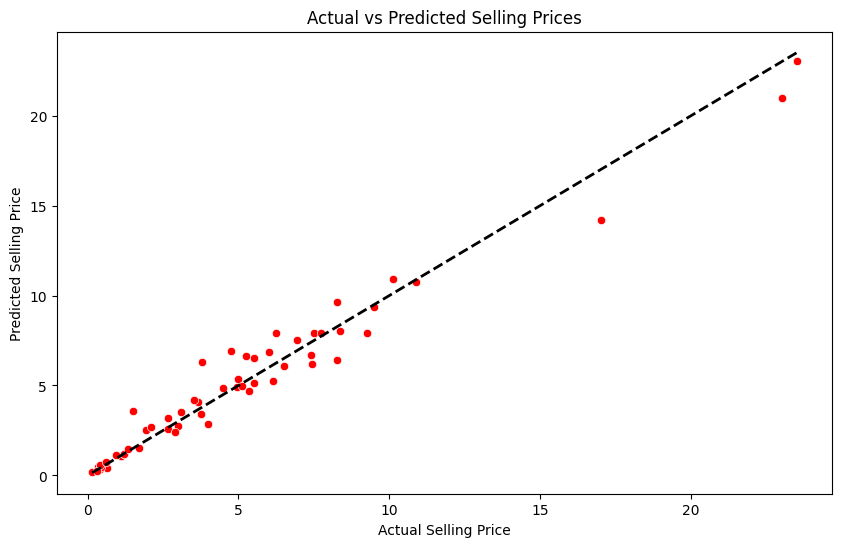

In [19]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, marker='o', color='red')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Prices')

# Show the plot
plt.show()